In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_parquet('../../../amalur-factorization/profiling/all_1repeat_operators_cleaned.parquet')
df.head()

,id,kernel_name,compute_throughput,dram_frequency,dram_throughput,duration,elapsed_cycles,l1_throughput,l1_hit_rate,l2_throughput,...,dram_bytes_read,dram_bytes_write,filename,gpu,experiment,block_size,grid_size,type,operator,dataset
0,0,cupy_copy__int64_int64,0.00,3.786260e+09,0.01,4192.0,3338.0,48.45,0.0,0.31,...,128.0,0.0,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...,a10g,all_1repeat_operators,"(2, 1, 1)","(1, 1, 1)",factorized,LMM,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...
1,1,void cub::DeviceScanInitKernel<cub::ScanTileSt...,0.01,4.186667e+09,0.01,3200.0,2832.0,76.68,0.0,0.37,...,128.0,0.0,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...,a10g,all_1repeat_operators,"(128, 1, 1)","(1, 1, 1)",factorized,LMM,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...
2,2,void cub::DeviceScanKernel<cub::DeviceScanPoli...,0.14,4.026144e+09,0.01,4896.0,4210.0,30.61,1.0,0.78,...,128.0,0.0,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...,a10g,all_1repeat_operators,"(128, 1, 1)","(1, 1, 1)",factorized,LMM,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...
3,3,void cusparse::<unnamed>::binary_search_partit...,0.16,5.339790e+09,7.30,13216.0,14889.0,7.74,1.0,1.35,...,494592.0,0.0,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...,a10g,all_1repeat_operators,"(128, 1, 1)","(8, 1, 1)",factorized,LMM,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...
4,4,void cusparse::<unnamed>::binary_search_lb_ker...,11.92,5.381468e+09,78.83,53184.0,60297.0,18.30,1.0,33.93,...,15289472.0,6371200.0,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...,a10g,all_1repeat_operators,"(128, 1, 1)","(977, 1, 1)",factorized,LMM,--mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_...


In [2]:
counts = df.groupby(['operator', 'type', 'gpu'])['id'].count()

In [3]:
df.groupby(['operator', 'type', 'gpu', 'dataset']).sum().head()

/tmp/ipykernel_7329/3331590880.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['operator', 'type', 'gpu', 'dataset']).sum().head()


id  \
operator        type       gpu  dataset                                                  
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  66   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  66   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  66   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  66   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  66   

                                                                                    compute_throughput  \
operator        type       gpu  dataset                                                                  
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...               82.19   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...               86.13   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...               71.81   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...               84.80   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...               71.67   

                                                                                    dram_frequency  \
operator        type       gpu  dataset                                                              
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...    6.223956e+10   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...    6.316146e+10   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...    6.274250e+10   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...    6.321743e+10   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...    6.316845e+10   

                                                                                    dram_throughput  \
operator        type       gpu  dataset                                                               
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...           108.18   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...           106.33   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...            49.94   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...           110.73   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...            48.72   

                                                                                    duration  \
operator        type       gpu  dataset                                                        
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  504800.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  428416.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  659552.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  496352.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...  565696.0   

                                                                                    elapsed_cycles  \
operator        type       gpu  dataset                                                              
Columnsummation factorized 1660 --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...        741755.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...        628416.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...        974515.0   
                                --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_...        

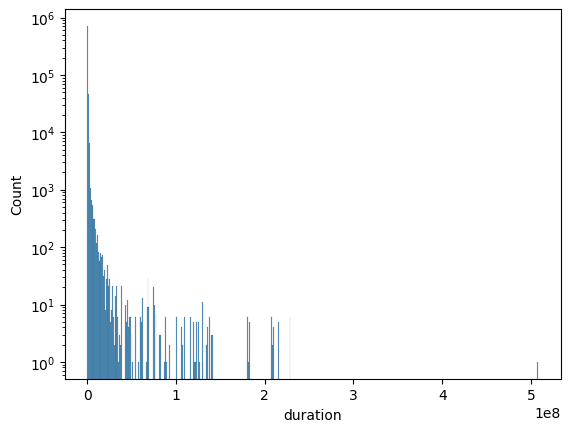

In [4]:
ax = sns.histplot(df['duration'], binwidth=0.01e8,)
ax.set_yscale('log')

In [5]:
import matplotlib.pyplot as plt
plt.show()

In [6]:
# Aggregate per operator: weighted mean of of metrics and sum of duration

In [7]:
import numpy as np
units = {
    "compute_throughput": "percent",
    "dram_frequency": "cycle/second",
    "dram_throughput": "percent",
    "duration": "nsecond",
    "elapsed_cycles": "cycle",
    "l1_throughput": "percent",
    "l1_hit_rate": "percent",
    "l2_throughput": "percent",
    "l2_hit_rate": "percent",
    "max_bandwidth": "percent",
    "mem_busy": "percent",
    "mem_pipes_busy": "percent",
    "memory_throughput": "percent",
    "memory_throughput_byte": "byte/second",    
    "sm_active_cycles": "cycle",
    "sm_frequency": "cycle/second",
    "dram_bytes_read": "byte",
    "dram_bytes_write": "byte",
}

def weighted_mean(values, weights):
    return np.sum(weights * values) / np.sum(weights)

def sum(values, *args):
    return np.sum(values)

def mean(values, *args):
    return np.mean(values)

def none(x, *args):
    return None

agg_functions = {
    "percent": weighted_mean,
    "cycle/second": none,
    "nsecond": sum,
    "cycle": sum,
    "byte": sum,
    "cycle/second": weighted_mean,
    "byte/second": weighted_mean
}

def aggregate(df):
    res = {}
    for col, unit in units.items():
        func = agg_functions.get(unit, none)
        res[f"{col}_{func.__name__}"] = func(df[col], df['duration'])
    return pd.Series(res)
aggregated_df = df.groupby(['operator', 'type', 'gpu', 'dataset']).apply(aggregate)

In [8]:
import json
with open ("/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1/daic/features/gpu-characteristics.json") as f:
    gpu_chars = json.load(f)
gpu_chars['1080'] = gpu_chars.pop('1080Ti')
gpu_chars['p100'] = gpu_chars.pop('P100')
gpu_chars['v100'] = gpu_chars.pop('V100')
gpu_chars['2080'] = gpu_chars.pop('2080Ti')
gpu_chars['a40'] = gpu_chars.pop('A40')
gpu_chars['a10g'] = gpu_chars.pop('A10G')
gpu_chars['1660'] = gpu_chars.pop('1660Ti')
gpu_chars_df = pd.DataFrame(gpu_chars).T.apply(pd.to_numeric, errors='ignore')
gpu_chars_df.rename(columns={x: f"gpu_{x}" for x in gpu_chars_df.columns}, inplace=True)
gpu_chars_df

,gpu__architecture,gpu__number_of_sm,gpu__cores,gpu_cache_size_l1,gpu_cache_size_l2,gpu_clock_speed_base,gpu_clock_speed_max_boost,gpu_memory_bus_width,gpu_memory_size,gpu_memory_clock,gpu_memory_bandwidth,gpu_processing_power_half_precision,gpu_processing_power_single_precision,gpu_processing_power_double_precision
1080,Pascal,28,3584,48,2.8,1480,1582,352,11,11000,484,0.17,10.61,0.330
p100,Pascal,56,3584,24,4.0,1126,1303,4096,16,1430,732,21.20,10.60,5.300
v100,Volta,80,5120,128,6.2,1230,1370,4096,32,1750,900,112.22,14.03,7.010
2080,Turing,68,4352,64,5.5,1350,1545,352,11,14000,616,23.50,11.75,0.320
a40,Ampere,84,10752,128,6.0,1305,1740,384,48,7248,696,149.68,37.42,1.170
a10g,Ampere,72,9216,128,6.0,1320,1710,384,24,6252,600,31.52,31.52,0.985
1660,Turing,24,1536,64,1.5,1500,1770,192,6,12000,288,9.22,4.61,0.140


In [9]:
with_gpu_chars = aggregated_df.reset_index().merge(gpu_chars_df, left_on='gpu', right_index=True)

In [10]:
with_gpu_chars.describe()

,compute_throughput_weighted_mean,dram_frequency_weighted_mean,dram_throughput_weighted_mean,duration_sum,elapsed_cycles_sum,l1_throughput_weighted_mean,l1_hit_rate_weighted_mean,l2_throughput_weighted_mean,l2_hit_rate_weighted_mean,max_bandwidth_weighted_mean,...,gpu_cache_size_l2,gpu_clock_speed_base,gpu_clock_speed_max_boost,gpu_memory_bus_width,gpu_memory_size,gpu_memory_clock,gpu_memory_bandwidth,gpu_processing_power_half_precision,gpu_processing_power_single_precision,gpu_processing_power_double_precision
count,3325.000000,3.325000e+03,3325.000000,3.325000e+03,3.325000e+03,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,...,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000
mean,14.641988,6.166919e+09,49.870619,6.589266e+07,9.046961e+07,24.723216,0.792557,25.147054,0.998170,52.057471,...,4.616842,1370.133835,1738.827068,324.985263,26.775338,8363.534436,537.332932,65.568589,25.291092,0.789314
std,12.007644,7.445471e+08,32.645978,1.241962e+08,1.745653e+08,13.090989,0.245024,15.325347,0.002930,33.249635,...,2.076627,86.749559,24.233282,88.602773,17.069381,2458.036057,170.857690,61.869082,13.996067,0.439410
min,0.187153,4.516258e+09,0.187558,4.041600e+04,4.992300e+04,1.183345,0.162334,0.117662,0.988710,0.352169,...,1.500000,1305.000000,1710.000000,192.000000,6.000000,6252.000000,288.000000,9.220000,4.610000,0.140000
25%,6.346482,5.640872e+09,11.968378,1.249120e+06,1.706370e+06,17.420489,0.742629,8.203190,0.997149,13.472628,...,1.500000,1305.000000,1710.000000,192.000000,6.000000,6252.000000,288.000000,9.220000,4.610000,0.140000
50%,14.613694,6.121370e+09,59.942321,6.973952e+06,8.782419e+06,25.050272,0.901870,29.999453,1.000000,65.012265,...,6.000000,1320.000000,1740.000000,384.000000,24.000000,7248.000000,600.000000,31.520000,31.520000,0.985000
75%,17.703415,6.746321e+09,82.593110,7.083533e+07,9.156360e+07,32.549017,0.967614,38.662071,1.000000,84.494477,...,6.000000,1500.000000,1770.000000,384.000000,48.000000,12000.000000,696.000000,149.680000,37.420000,1.170000
max,81.060451,9.474108e+09,91.209112,7.227483e+08,1.090849e+09,79.766301,0.999598,47.969233,1.000000,91.235039,...,6.000000,1500.000000,1770.000000,384.000000,48.000000,12000.000000,696.000000,149.680000,37.420000,1.170000


In [11]:
with_gpu_chars[[x for x in with_gpu_chars.columns if 'l1' in x or 'l2' in x or 'dram' in x]]

,dram_frequency_weighted_mean,dram_throughput_weighted_mean,l1_throughput_weighted_mean,l1_hit_rate_weighted_mean,l2_throughput_weighted_mean,l2_hit_rate_weighted_mean,dram_bytes_read_sum,dram_bytes_write_sum,gpu_cache_size_l1,gpu_cache_size_l2
0,5.585885e+09,6.732479,5.541501,0.976926,7.548491,1.000000,8.365440e+06,4.146880e+05,64,1.5
1,5.640872e+09,7.149560,5.925364,0.973708,7.923254,1.000000,7.561504e+06,3.811520e+05,64,1.5
2,5.668171e+09,4.906661,6.361888,0.981563,5.559798,1.000000,8.498912e+06,3.016640e+05,64,1.5
3,5.666172e+09,6.718101,5.670674,0.976662,7.601705,1.000000,8.561120e+06,4.009280e+05,64,1.5
4,5.623562e+09,5.535707,6.357983,0.980032,6.276584,1.000000,8.195616e+06,2.589760e+05,64,1.5
...,...,...,...,...,...,...,...,...,...,...
3320,7.776221e+09,9.434067,26.856021,0.926148,6.982541,1.000000,1.154509e+08,3.584000e+03,128,6.0
3321,6.748394e+09,9.665799,26.742579,0.926008,7.227809,1.000000,1.154484e+08,2.816000e+03,128,6.0
3322,5.963211e+09,58.677727,35.010319,0.942614,36.332214,1.000000,1.225429e+09,5.688818e+08,128,6.0
3323,7.096939e+09,83.946295,29.252095,0.682232,42.132908,0.994407,1.903227e+10,1.580797e+10,128,6.0


In [12]:
# math cost = sm_active_cycles / sm frequency
with_gpu_chars['math_cost_seconds'] = with_gpu_chars['sm_active_cycles_sum'] / with_gpu_chars['sm_frequency_weighted_mean']
with_gpu_chars['math_cost_seconds'].describe()

count    3325.000000
mean        0.062634
std         0.123583
min         0.000008
25%         0.000540
50%         0.004460
75%         0.065843
max         0.721162
Name: math_cost_seconds, dtype: float64

In [13]:
with_gpu_chars['mem_cost_seconds'] = (with_gpu_chars['dram_bytes_read_sum'] + with_gpu_chars['dram_bytes_write_sum']) / with_gpu_chars['memory_throughput_byte_weighted_mean']
with_gpu_chars['mem_cost_seconds'].describe()

count    3325.000000
mean        0.065893
std         0.124196
min         0.000040
25%         0.001249
50%         0.006974
75%         0.070835
max         0.722748
Name: mem_cost_seconds, dtype: float64

In [14]:
(with_gpu_chars.math_cost_seconds / with_gpu_chars.mem_cost_seconds).describe()

count    3325.000000
mean        0.741346
std         0.292248
min         0.016198
25%         0.565603
50%         0.886544
75%         0.979640
max         1.001116
dtype: float64

In [15]:
# looks like mem_cost_seconds is a perfect approximation of duration_sum, so probably wrong calc...
(with_gpu_chars.mem_cost_seconds / (with_gpu_chars.duration_sum / 1e9)).describe()

count    3.325000e+03
mean     1.000000e+00
std      1.436778e-13
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

<Axes: ylabel='Density'>

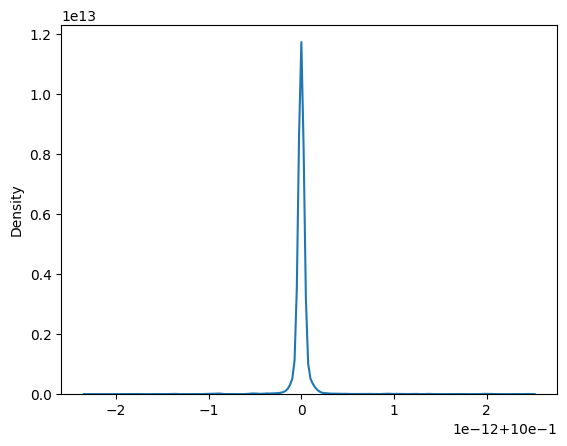

In [16]:
# ax = sns.scatterplot(data=with_gpu_chars, x='math_cost_seconds', y='duration_sum', hue='gpu')
sns.kdeplot(with_gpu_chars.mem_cost_seconds / (with_gpu_chars.duration_sum / 1e9))

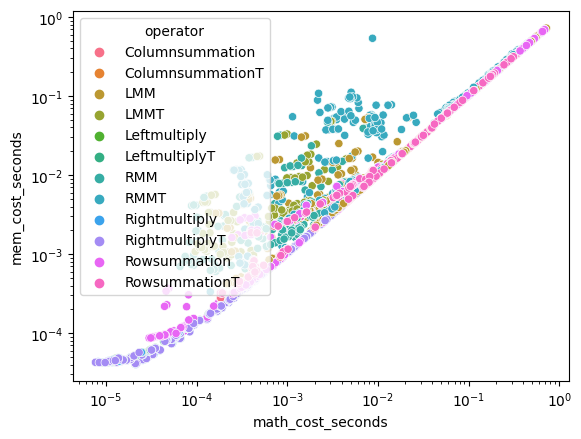

In [17]:
ax = sns.scatterplot(data=with_gpu_chars, x='math_cost_seconds', y='mem_cost_seconds', hue='operator')
ax.set_yscale('log')
ax.set_xscale('log')


[Text(0, 0, 'Columnsummation'),
 Text(1, 0, 'ColumnsummationT'),
 Text(2, 0, 'LMM'),
 Text(3, 0, 'LMMT'),
 Text(4, 0, 'Leftmultiply'),
 Text(5, 0, 'LeftmultiplyT'),
 Text(6, 0, 'RMM'),
 Text(7, 0, 'RMMT'),
 Text(8, 0, 'Rightmultiply'),
 Text(9, 0, 'RightmultiplyT'),
 Text(10, 0, 'Rowsummation'),
 Text(11, 0, 'RowsummationT')]

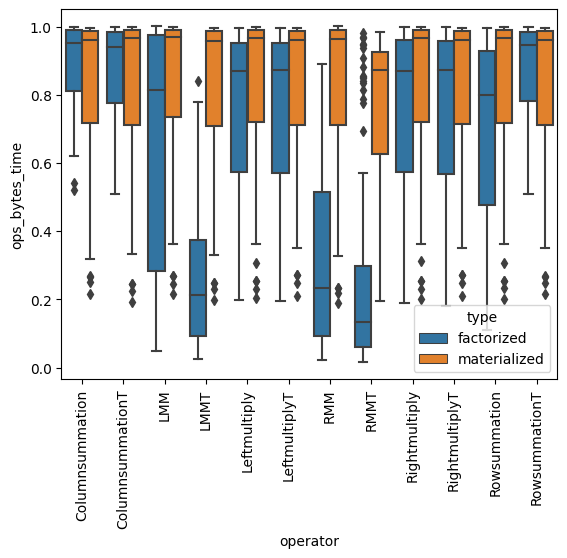

In [31]:
with_gpu_chars['ops_bytes_time'] = with_gpu_chars['math_cost_seconds']/ with_gpu_chars['mem_cost_seconds']
ax = sns.boxplot(data=with_gpu_chars, y='ops_bytes_time', x='operator', hue='type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# ax.set_yscale('log')
# ax.set_xscale('log')


<Axes: >

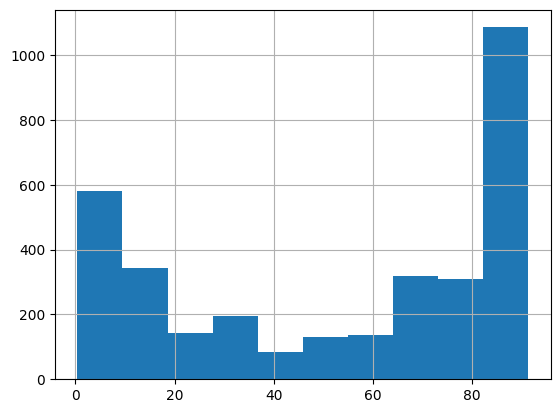

In [18]:
with_gpu_chars.memory_throughput_weighted_mean.hist()

In [19]:
with_gpu_chars.columns

Index(['operator', 'type', 'gpu', 'dataset',
       'compute_throughput_weighted_mean', 'dram_frequency_weighted_mean',
       'dram_throughput_weighted_mean', 'duration_sum', 'elapsed_cycles_sum',
       'l1_throughput_weighted_mean', 'l1_hit_rate_weighted_mean',
       'l2_throughput_weighted_mean', 'l2_hit_rate_weighted_mean',
       'max_bandwidth_weighted_mean', 'mem_busy_weighted_mean',
       'mem_pipes_busy_weighted_mean', 'memory_throughput_weighted_mean',
       'memory_throughput_byte_weighted_mean', 'sm_active_cycles_sum',
       'sm_frequency_weighted_mean', 'dram_bytes_read_sum',
       'dram_bytes_write_sum', 'gpu__architecture', 'gpu__number_of_sm',
       'gpu__cores', 'gpu_cache_size_l1', 'gpu_cache_size_l2',
       'gpu_clock_speed_base', 'gpu_clock_speed_max_boost',
       'gpu_memory_bus_width', 'gpu_memory_size', 'gpu_memory_clock',
       'gpu_memory_bandwidth', 'gpu_processing_power_half_precision',
       'gpu_processing_power_single_precision',
       'gpu_pro

Need: 
- compute time
- math time
- cost is max(compute time, math time)
- GPUs ops:bytes ratio

In [20]:
with_gpu_chars['bytes']

KeyError: 'bytes'

## Add calculated metrics

- dram_read = dram_bytes_read_sum
- dram_latency = ???
- dram_time = dram_read / memory_throughput_byte_weighted_mean
- l1 hitrate = l1_hit_rate_weighted_mean
- l1 latency = ???
- l1 bandwidth = 

l2 read = (1 - l2 hitrate) * dram_read

l2 read = (l1 miss * l1_read)

dram_read  = (l1 miss * l1_read) + (l2 miss * (l1 miss * l1_read))

l1_read = dram_read / (l2 miss * l1 miss + l1 miss)

- l1 amount read = 
- l2 hitrate = 
- l2 latency = 
- l2 bandwidth = 
- l2 amount read = 


from https://arxiv.org/pdf/1804.06826.pdf (V100)
 - L1 latency (cycles) 28
 - L2 latency (cycles) 193
 - DRAM latency


$$Teff = h1*t1 + (1-h1)*h2*t2 + (1-h1)*(1-h2)*t3$$
 - h1: l1_hit_rate_weighted_mean
 - t1 (micros): 30 cycles = 30 / gpu_clock_speed_base
 - h2: l2_hit_rate_weighted_mean
 - t2 (micros): 200 / gpu_clock_speed_base
 - t3: 600 / gpu_clock_speed_base

In [49]:
clock_speed_base = with_gpu_chars["gpu_clock_speed_base"]
l1_latency_ns = 30 / clock_speed_base * 1000
l2_latency_ns = 100 / clock_speed_base * 1000
dram_latency_ns = 600 / clock_speed_base * 1000
l1_hitrate = with_gpu_chars["l1_hit_rate_weighted_mean"]
l2_hitrate = (1 - l1_hitrate) * with_gpu_chars["l2_hit_rate_weighted_mean"]
dram_hitrate = (1 - l1_hitrate) * (1 - l2_hitrate)
with_gpu_chars["mem_time_eff_ns"] = (
    l1_hitrate * l1_latency_ns
    + l2_hitrate * l2_latency_ns
    + dram_hitrate * dram_latency_ns
)
with_gpu_chars['mem_cost_test'] = ((with_gpu_chars["mem_time_eff_ns"] + with_gpu_chars["dram_bytes_read_sum"]) / 1e9 / with_gpu_chars["mem_cost_seconds"])
with_gpu_chars.groupby("gpu")['mem_cost_test'].describe()

,count,mean,std,min,25%,50%,75%,max
gpu,,,,,,,,
1660,1022.0,87.608489,47.652180,1.436142,38.142708,103.238382,128.338897,182.544616
a10g,1152.0,185.164319,119.658971,1.288929,56.222906,205.501300,282.561185,505.088527
a40,1151.0,207.246413,138.576276,1.086725,56.934109,224.877212,324.450350,551.286160


count    3325.000000
mean        1.272631
std         0.953279
min         0.008490
25%         0.406330
50%         1.064291
75%         2.159570
max         4.306944
dtype: float64

In [ ]:
with_gpu_chars['calc_l2_read_sum'] =((1 - with_gpu_chars.l2_hit_rate_weighted_mean ) * with_gpu_chars.dram_bytes_read_sum)
with_gpu_chars['calc_l1_read_sum'] =((1 - with_gpu_chars.l1_hit_rate_weighted_mean ) * with_gpu_chars.calc_l2_read_sum)

In [ ]:
with_gpu_chars[['dram_bytes_read_sum', 'l2_hit_rate_weighted_mean', 'calc_l2_read_sum', 'calc_l1_read_sum']]

,dram_bytes_read_sum,l2_hit_rate_weighted_mean,calc_l2_read_sum,calc_l1_read_sum
0,8.365440e+06,1.000000,0.000000e+00,0.000000e+00
1,7.561504e+06,1.000000,0.000000e+00,0.000000e+00
2,8.498912e+06,1.000000,0.000000e+00,0.000000e+00
3,8.561120e+06,1.000000,0.000000e+00,0.000000e+00
4,8.195616e+06,1.000000,0.000000e+00,0.000000e+00
...,...,...,...,...
3320,1.154509e+08,1.000000,0.000000e+00,0.000000e+00
3321,1.154484e+08,1.000000,0.000000e+00,0.000000e+00
3322,1.225429e+09,1.000000,0.000000e+00,0.000000e+00
3323,1.903227e+10,0.994407,1.064488e+08,3.382599e+07


In [32]:
tranpose = with_gpu_chars[with_gpu_chars.gpu == 'a10g'].head().T

In [ ]:
def cache_cost(df):
    

In [ ]:
aggregated_df['cache_cost'] = aggregated_df['l1_hit_rate_weighted_mean'] * aggregated_df['l1_throughput_weighted_mean'] + aggregated_df['l2_hit_rate_weighted_mean'] * aggregated_df['l2_throughput_weighted_mean']

operator         type          gpu   dataset                                                                                                                                        
Columnsummation  factorized    1660  --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_c_S=0.1-rho_c_R=0.1-p=0.0-join=inner--ratio_9.5--data--_preset                                        504800.0
                                     --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_c_S=0.1-rho_c_R=0.1-p=0.0-join=left-t_R=0.6--ratio_8.5--data--_preset                                 428416.0
                                     --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_c_S=0.1-rho_c_R=0.1-p=0.1-join=outer-t_R=0.7-rho_r_S=0.9--ratio_5.0--data--_preset                    659552.0
                                     --mnt--data--100k--n_R=1-r_T=100000-c_T=10-rho_c_S=0.1-rho_c_R=0.1-p=0.1-join=outer-t_R=0.9-rho_r_S=1.0--ratio_7.5--data--_preset                    496352.0
                                     --

In [ ]:
testdf.groupby(['operator', 'type', 'gpu', 'dataset']).apply(lambda x: weighted_mean(x['duration'], x['compute_throughput'])).head()

operator          type          gpu   dataset                                                                                                                         
ColumnsummationT  materialized  a10g  --mnt--data--1M--n_R=1-r_T=1000000-c_T=40-rho_c_S=0.1-rho_c_R=0.1-p=0.1-join=outer-t_R=0.7-rho_r_S=0.9--ratio_5.0--data--_preset    13.746692
LMM               factorized    a10g  --mnt--data--1M--n_R=1-r_T=1000000-c_T=30-rho_c_S=0.3-rho_c_R=0.3-p=0.1-join=outer-t_R=0.2-rho_r_S=1.0--ratio_1.0--data--_preset    72.314885
dtype: float64

operator
ColumnsummationT    Axes(0.125,0.11;0.775x0.77)
LMM                 Axes(0.125,0.11;0.775x0.77)
dtype: object

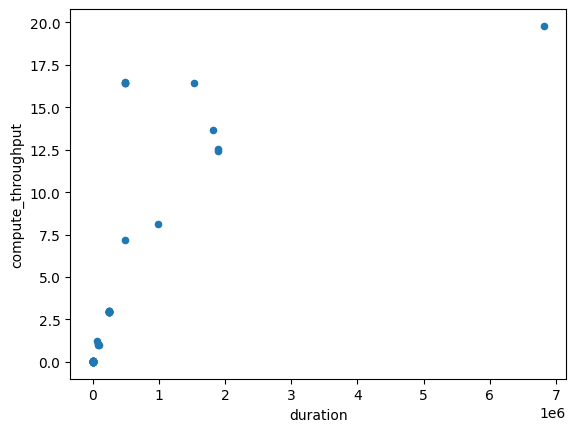

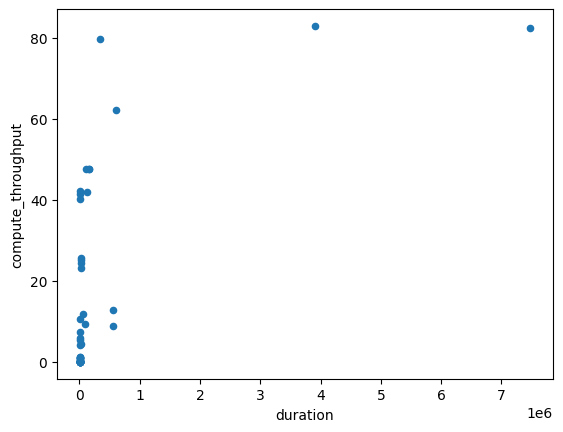

In [ ]:
testdf.groupby('operator').plot(x='duration', y='compute_throughput', kind='scatter', )

In [ ]:
testdf = df.head(100).copy()
testdf['sm_freq_compute'] = testdf["sm_active_cycles"] / testdf["duration"]
testdf[['sm_freq_compute', 'sm_frequency']]

metric,sm_freq_compute,sm_frequency
0,0.004430,7.960060e+08
1,0.003669,8.843304e+08
2,0.006038,8.595938e+08
3,0.096859,1.126200e+09
4,0.990490,1.132612e+09
...,...,...
47,1.309943,1.316059e+09
48,0.836680,1.219399e+09
49,1.311582,1.323093e+09
50,0.855133,1.243248e+09


/tmp/ipykernel_81919/1349319077.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sumdf = df.groupby(['operator', 'type', 'gpu', 'dataset']).sum().reset_index(drop=False)


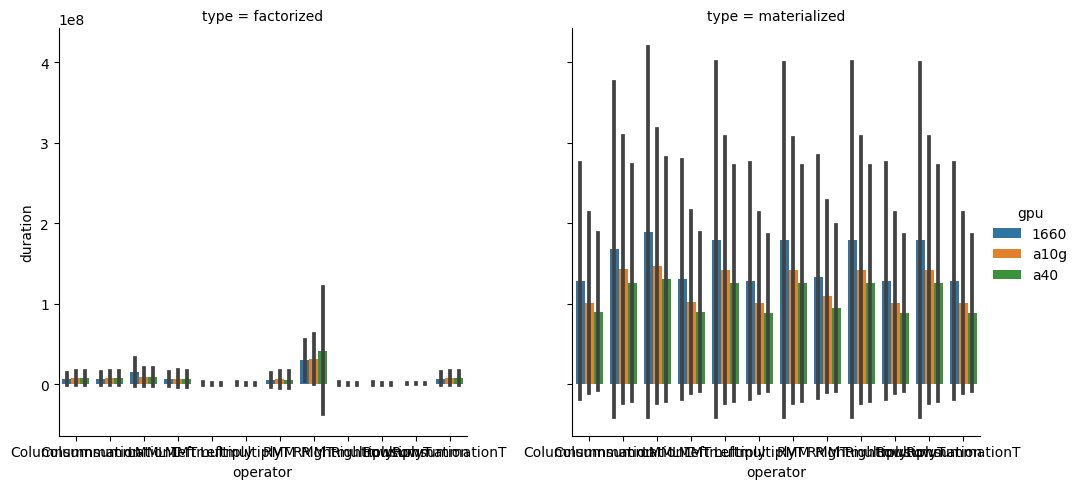

In [ ]:
sumdf = df.groupby(['operator', 'type', 'gpu', 'dataset']).sum().reset_index(drop=False)
sns.catplot(data=sumdf, x='operator', y='duration', hue='gpu', col='type', kind='bar', ci='sd')